In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import os
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import StandardScaler

from dotenv import dotenv_values, find_dotenv
import importlib

In [6]:
import preparecorrelations as pc
import regressions as reg

# special import for kernel
importlib.reload(pc)
importlib.reload(reg)

<module 'regressions' from 'c:\\Users\\fuem\\Documents\\correlations_comovement\\regressions.py'>

In [7]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'

In [8]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

In [11]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")

# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
rgdp_detrended = pc.Prepare_Correlations(pc.SeasonalAdjustment(pc.fixCols(rgdp, original_countries)), detrending='HP Filter').detrend(start_date="1998-01-01", end_date="2021-12-31").data

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

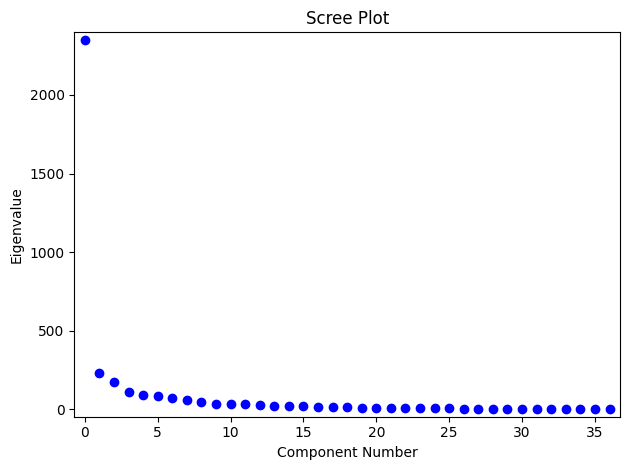

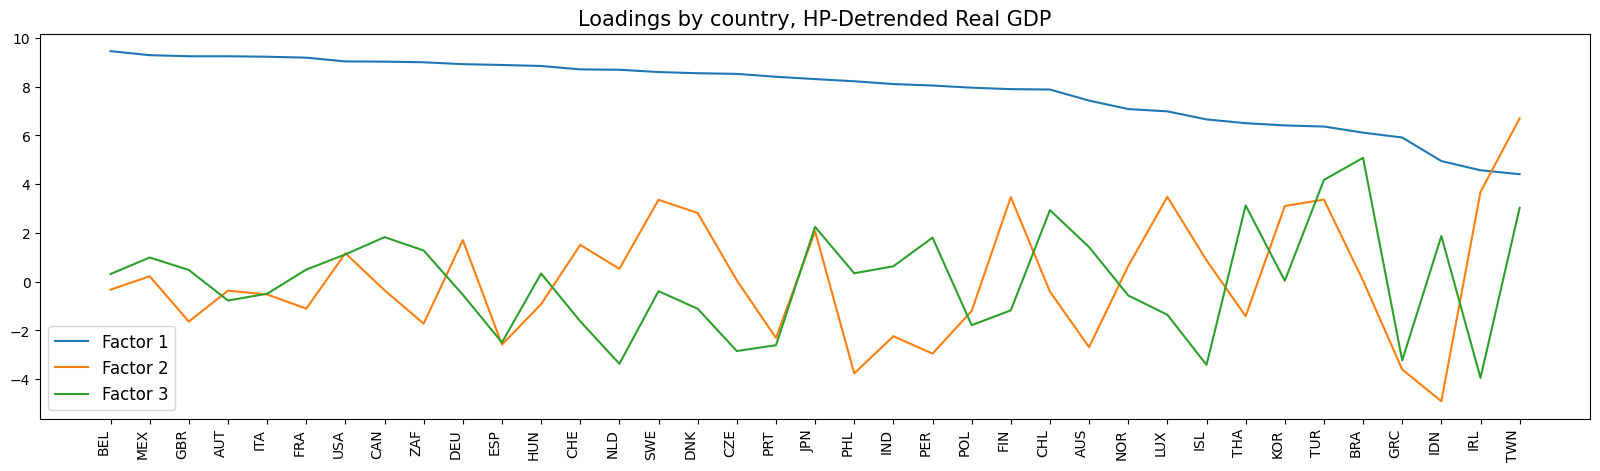

In [14]:
test_pc = PCA(rgdp_detrended, missing='drop-row', standardize=True, normalize=True)

test_pc.plot_scree(log_scale=False)
plt.title('Scree Plot, HP-Detrended Real GDP', fontsize=15)

loadings = test_pc.coeff
loadings = loadings.transpose()
loadings = loadings.sort_values(by="comp_00", ascending=False)

fig,ax = plt.subplots(1, sharex=True, figsize=(20,5))
ax.tick_params(axis='both', which='major', labelsize=10)
line,=ax.plot(loadings['comp_00'])  # factor 1
line2,=ax.plot(loadings['comp_01']) # factor 2
line3,=ax.plot(loadings['comp_02']) # factor 2
lgd=plt.legend(['Factor 1','Factor 2', 'Factor 3'], fontsize=12)
plt.title("Loadings by country, HP-Detrended Real GDP", fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

In [15]:
countries = ['USA', 'IRL', 'BEL']
subsection = rgdp_detrended[countries]

subsection_pc = PCA(subsection, missing='drop-row', standardize=True, normalize=True)

loadings = subsection_pc.coeff
loadings = loadings.transpose()

factors = subsection_pc.factors

In [16]:
factors.head()

,comp_0,comp_1,comp_2
date,,,
1998-01-01,-0.061974,-0.031079,-0.192203
1998-04-01,-0.072643,-0.003006,-0.140695
1998-07-01,-0.045439,0.065540,-0.012268
1998-10-01,-0.072072,-0.082236,0.149379
1999-01-01,-0.022037,-0.002466,0.145899


In [17]:
factor_correlations = factors.corr()
factor_correlations

,comp_0,comp_1,comp_2
comp_0,1.000000e+00,-1.491862e-16,-5.243202e-16
comp_1,-1.491862e-16,1.000000e+00,-1.155760e-15
comp_2,-5.243202e-16,-1.155760e-15,1.000000e+00


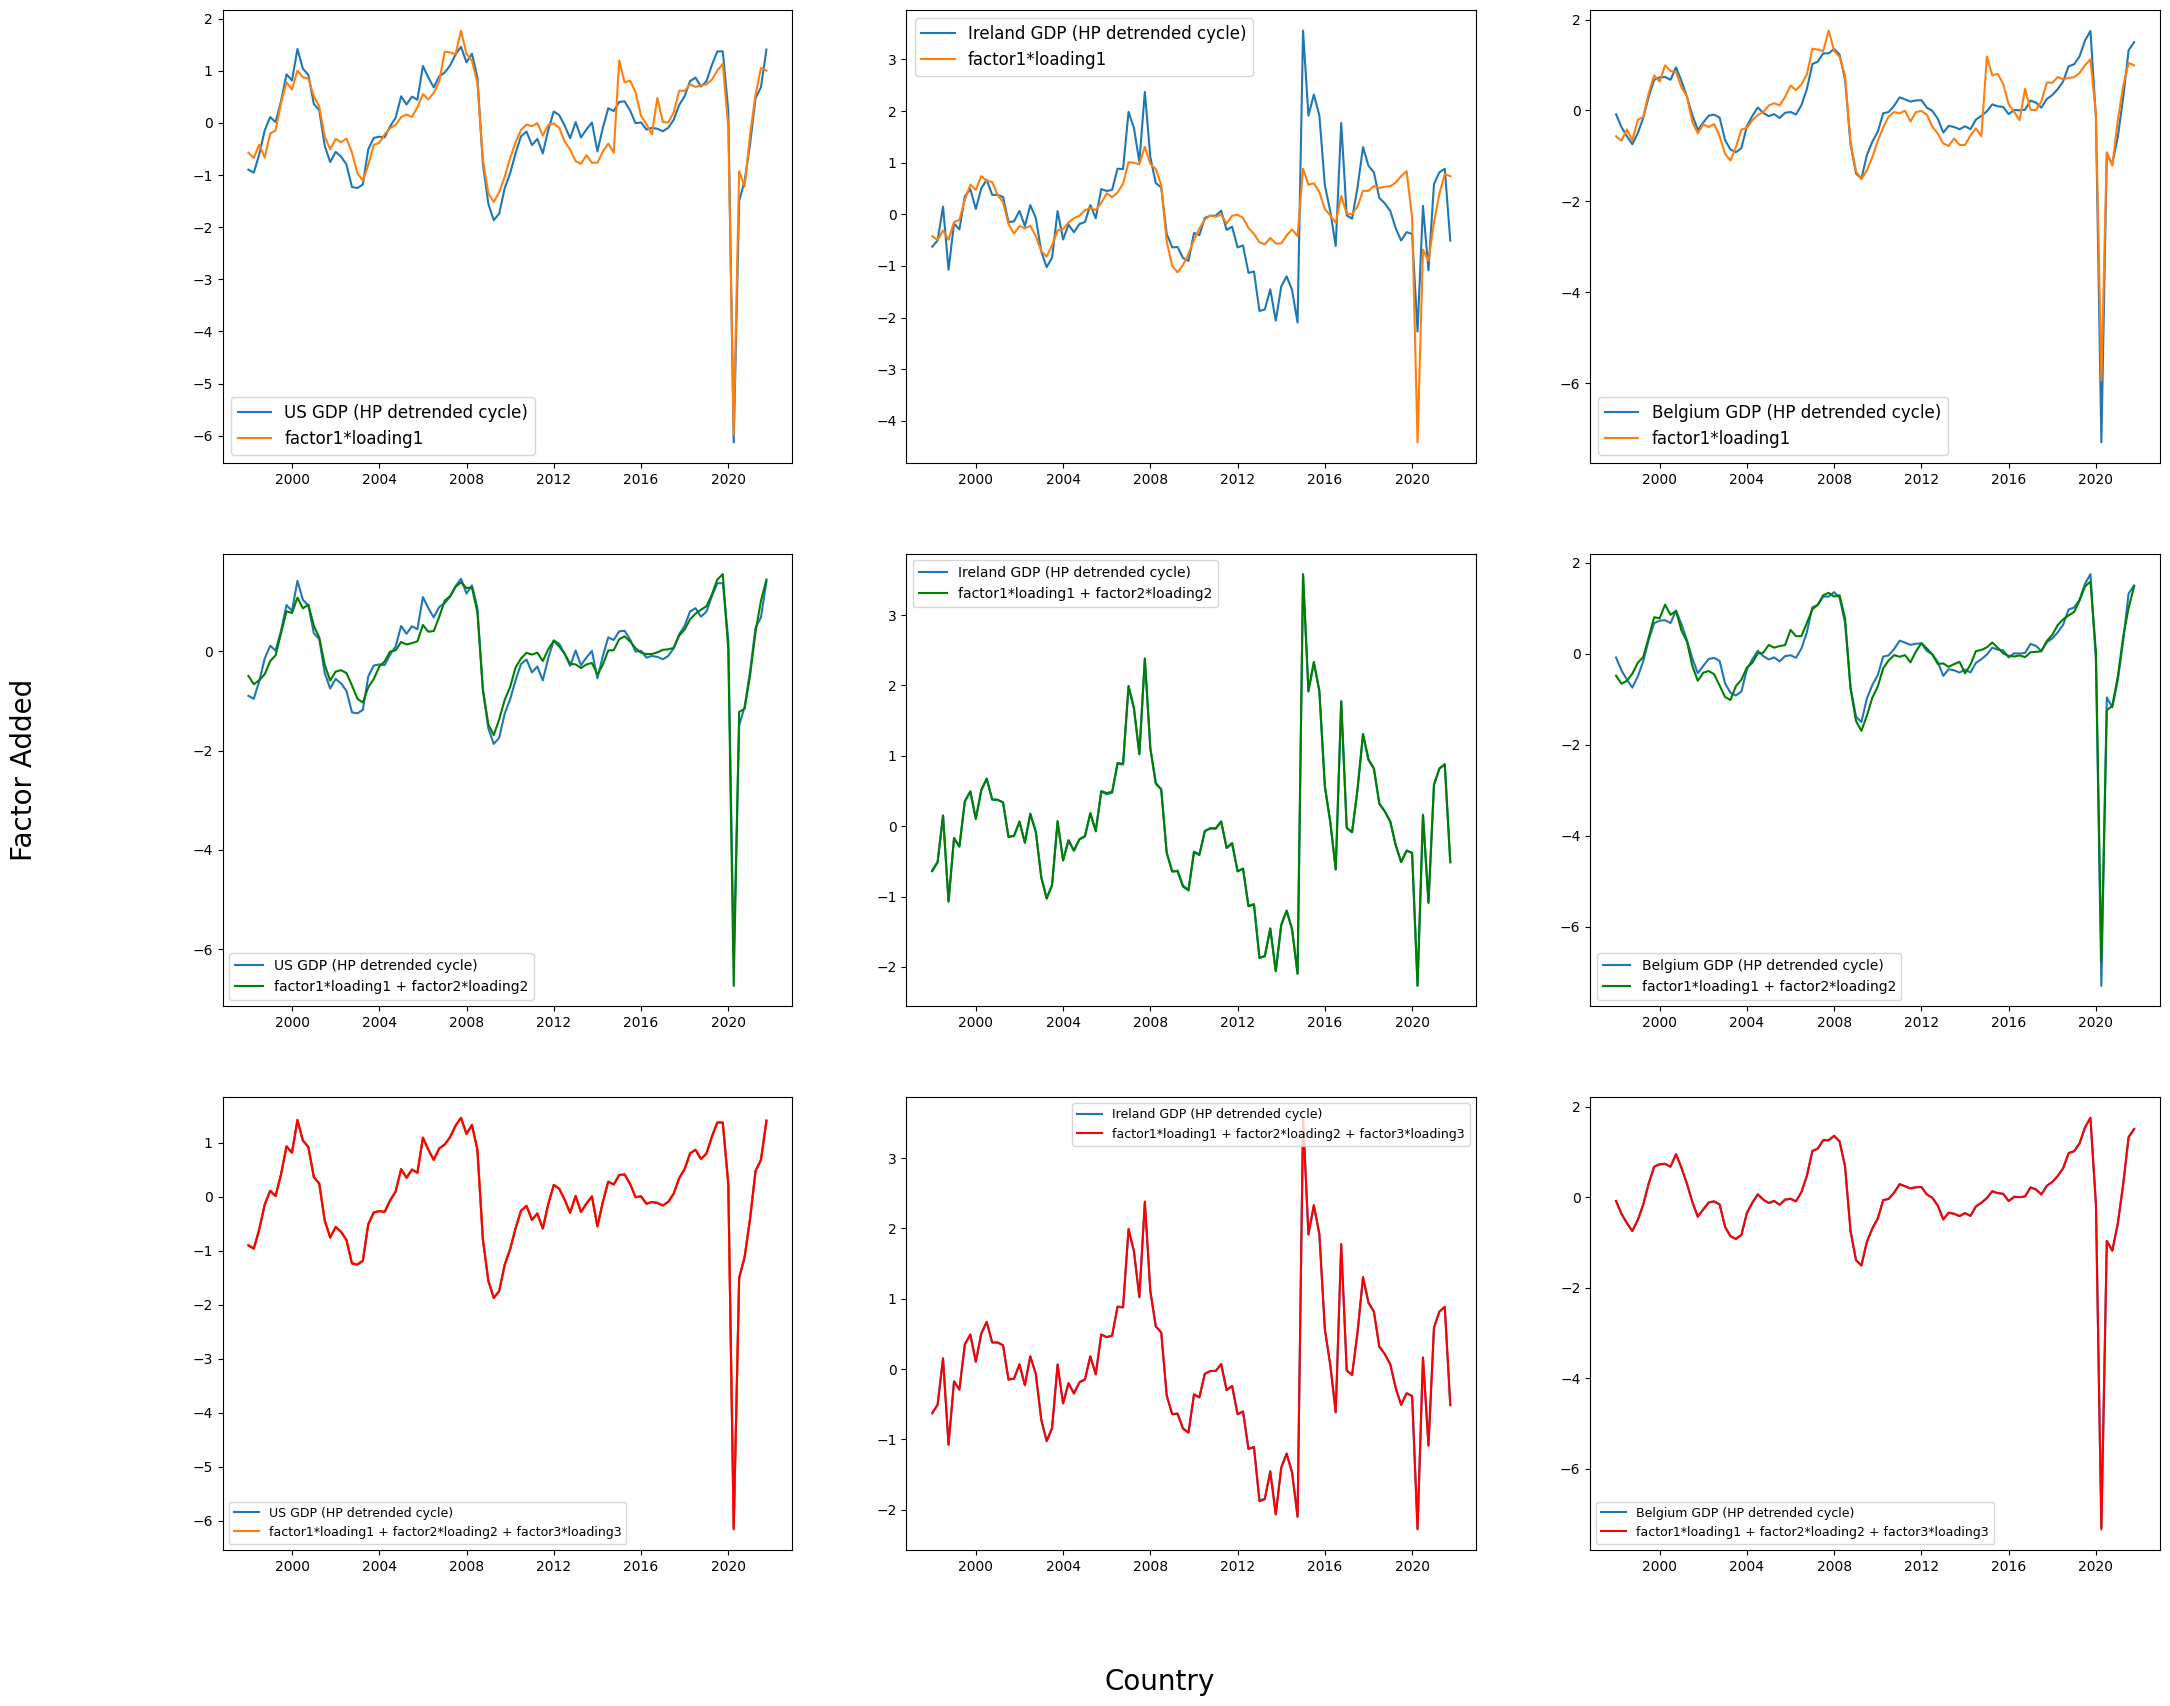

In [18]:
standardize = lambda x: (x-x.mean())/x.std()

USAfactor1 = factors['comp_0'].apply(lambda x: x*loadings.loc[['USA']]['comp_0'])
USAfactor2 = factors['comp_1'].apply(lambda x: x*loadings.loc[['USA']]['comp_1'])
USAfactor3 = factors['comp_2'].apply(lambda x: x*loadings.loc[['USA']]['comp_2'])
USA_standardized = standardize(subsection['USA'])

IRLfactor1 = factors['comp_0'].apply(lambda x: x*loadings.loc[['IRL']]['comp_0'])
IRLfactor2 = factors['comp_1'].apply(lambda x: x*loadings.loc[['IRL']]['comp_1'])
IRLfactor3 = factors['comp_2'].apply(lambda x: x*loadings.loc[['IRL']]['comp_2'])
IRL_standardized = standardize(subsection['IRL'])

BELfactor1 = factors['comp_0'].apply(lambda x: x*loadings.loc[['BEL']]['comp_0'])
BELfactor2 = factors['comp_1'].apply(lambda x: x*loadings.loc[['BEL']]['comp_1'])
BELfactor3 = factors['comp_2'].apply(lambda x: x*loadings.loc[['BEL']]['comp_2'])
BEL_standardized = standardize(subsection['BEL'])

fig = plt.figure(figsize=(25,20))
fig.text(0.5, 0.04, 'Country', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Factor Added', va='center', rotation='vertical', fontsize=20)

ax1 = plt.subplot(3, 3, 1)
line,=ax1.plot(USA_standardized)  # original cycle
line2,=ax1.plot(USAfactor1) # factor1*loading1
plt.legend(['US GDP (HP detrended cycle)','factor1*loading1'], fontsize=12)

ax2 = plt.subplot(3, 3, 2)
line,=ax2.plot(IRL_standardized)  # original cycle
line2,=ax2.plot(IRLfactor1) # factor1*loading1
plt.legend(['Ireland GDP (HP detrended cycle)','factor1*loading1'], fontsize=12)

ax3 = plt.subplot(3, 3, 3)
line,=ax3.plot(BEL_standardized)  # original cycle
line2,=ax3.plot(BELfactor1) # factor1*loading1
plt.legend(['Belgium GDP (HP detrended cycle)','factor1*loading1'], fontsize=12)

ax4 = plt.subplot(3, 3, 4)
line,=ax4.plot(USA_standardized)  # original cycle
line2,=ax4.plot(USAfactor1['USA'].add(USAfactor2['USA']), '-g') # factor1*loading1 + factor2*loading2
plt.legend(['US GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2'], fontsize=10)

ax5 = plt.subplot(3, 3, 5)
line,=ax5.plot(IRL_standardized)  # original cycle
line2,=ax5.plot(IRLfactor1['IRL'].add(IRLfactor2['IRL']), '-g') # factor1*loading1 + factor2*loading2
plt.legend(['Ireland GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2'], fontsize=10)

ax6 = plt.subplot(3, 3, 6)
line,=ax6.plot(BEL_standardized)  # original cycle
line2,=ax6.plot(BELfactor1['BEL'].add(BELfactor2['BEL']), '-g') # factor1*loading1 + factor2*loading2
plt.legend(['Belgium GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2'], fontsize=10)

ax7 = plt.subplot(3, 3, 7)
plt.plot(USA_standardized, )
line,=ax7.plot(USA_standardized)  # original cycle
line2,=ax7.plot(USAfactor1['USA'].add(USAfactor2['USA']).add(USAfactor3['USA']), '-r') # factor1*loading1 + factor2*loading2 + factor3*loading3
plt.legend(['US GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2 + factor3*loading3'], fontsize=9)

ax8 = plt.subplot(3, 3, 8)
line,=ax8.plot(IRL_standardized)  # original cycle
line2,=ax8.plot(IRLfactor1['IRL'].add(IRLfactor2['IRL']).add(IRLfactor3['IRL']), '-r')  # factor1*loading1 + factor2*loading2 + factor3*loading3
plt.legend(['Ireland GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2 + factor3*loading3'], fontsize=9)

ax9 = plt.subplot(3, 3, 9)
line,=ax9.plot(BEL_standardized)  # original cycle
line2,=ax9.plot(BELfactor1['BEL'].add(BELfactor2['BEL']).add(BELfactor3['BEL']), '-r') # factor1*loading1 + factor2*loading2
plt.legend(['Belgium GDP (HP detrended cycle)','factor1*loading1 + factor2*loading2 + factor3*loading3'], fontsize=9)

plt.show()